In [1]:
#!pip install stop-words
#!pip install keras
#!pip install tensorflow
#!pip install plotly
#!pip install keras-self-attention
#!pip install attention

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import string
import nltk
from collections import Counter
import re
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from random import shuffle
#nltk.download()
string.punctuation

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Exploratory Data Analysis and Data Pre-Processing

English Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
!ls "/content/drive/My Drive/project/"

ces.txt  deu.txt  Eng-Cs.ipynb	Eng-De.ipynb  stopwords-cs.txt


In [5]:
#Dataset
file = "/content/drive/My Drive/project/deu.txt"

In [6]:
with open (file, 'r', encoding = 'utf-8') as f: 
  data = f.read().split('\n')
len(data)

227081

In [7]:
from sklearn.utils import shuffle
data = shuffle(data)

In [8]:
data = data[:72777]

In [9]:
input_texts = []
target_texts = []
for line in data:
  input_texts.append(line.split('\t')[:-1][0])
  target_texts.append(line.split('\t')[:-1][1])

In [10]:
len(input_texts), len(target_texts)

(72777, 72777)

In [11]:
input_texts[111]

'She was busy doing her homework.'

In [12]:
target_texts[111]

'Sie war mit ihren Hausaufgaben beschäftigt.'

In [13]:
df = pd.DataFrame(columns=['English', 'German'])
df['English'] = input_texts
df['German'] = target_texts
df.to_csv('English_German.csv', index=False)
df

,English,German
0,I have a new book I'm working on.,Ich arbeite gerade an einem neuen Buch.
1,When did you finish the work?,Wann warst du mit der Arbeit fertig?
2,I don't want to mess it up.,Ich will es nicht vermasseln.
3,Tom bought a camera from Mary.,Tom kaufte Maria einen Fotoapparat ab.
4,What did you think of my house?,Wir fandet ihr mein Haus?
...,...,...
72772,I guess Tom forgot to tell you.,"Tom hat wohl vergessen, es dir zu sagen."
72773,I must be leaving now.,Ich muss jetzt gehen.
72774,I did nothing out of the ordinary.,Ich tat nichts Außergewöhnliches.
72775,I wish he would write more often.,"Ich wünschte, er würde öfter schreiben."


In [14]:
eng_data =df.English

In [15]:
print("Total number of records for English dataset: ",len(eng_data))

Total number of records for English dataset:  72777


In [16]:
count_eng_words = [word for sentence in eng_data for word in sentence.split()]

In [17]:
eng_words =len(count_eng_words)
print("Number of English words:",eng_words)

Number of English words: 461664


In [18]:
unique_eng_words=len(Counter(count_eng_words))
print("Number of unique English words:", unique_eng_words)

Number of unique English words: 20622


In [19]:
common = Counter(count_eng_words).most_common(10)
print("Most common words in English dataset:", common)

Most common words in English dataset: [('Tom', 17069), ('to', 15871), ('I', 15471), ('the', 12632), ('you', 11047), ('a', 10264), ('is', 7902), ('in', 5062), ('of', 4840), ('was', 4197)]


German Dataset

In [20]:
de_data =df.German

In [21]:
print("Total number of records for German dataset: ",len(de_data))

Total number of records for German dataset:  72777


In [22]:
count_de_words = [word for sentence in de_data for word in sentence.split()]

In [23]:
de_words =len(count_de_words)
print("Number of German words:",de_words)

Number of German words: 464625


In [24]:
unique_de_words=len(Counter(count_de_words))
print("Number of unique German words:", unique_de_words)

Number of unique German words: 34911


In [25]:
common = Counter(count_de_words).most_common(10)
print("Most common words in German dataset:", common)

Most common words in German dataset: [('Tom', 17949), ('Ich', 14264), ('ist', 8538), ('nicht', 8253), ('zu', 6692), ('Sie', 6395), ('du', 5579), ('das', 5267), ('ich', 4905), ('die', 4386)]


In [26]:
# length of message excluding space
length = df.copy()
length['body_length_English'] = length['English'].apply(lambda x: len(str(x)) - (str(x).count(" ")))
length['body_length_German'] = length['German'].apply(lambda x: len(str(x)) - (str(x).count(" ")))
length

,English,German,body_length_English,body_length_German
0,I have a new book I'm working on.,Ich arbeite gerade an einem neuen Buch.,26,33
1,When did you finish the work?,Wann warst du mit der Arbeit fertig?,24,30
2,I don't want to mess it up.,Ich will es nicht vermasseln.,21,25
3,Tom bought a camera from Mary.,Tom kaufte Maria einen Fotoapparat ab.,25,33
4,What did you think of my house?,Wir fandet ihr mein Haus?,25,21
...,...,...,...,...
72772,I guess Tom forgot to tell you.,"Tom hat wohl vergessen, es dir zu sagen.",25,33
72773,I must be leaving now.,Ich muss jetzt gehen.,18,18
72774,I did nothing out of the ordinary.,Ich tat nichts Außergewöhnliches.,28,30
72775,I wish he would write more often.,"Ich wünschte, er würde öfter schreiben.",27,34


In [27]:
#Histogram for Length
x1 = length.body_length_English
x2 = length.body_length_German
# Group data together
hist_data = [x1, x2]
group_labels = ['Length English', 'Length German']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[0, 5, 10])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [28]:
# % of punctuation excluding space
punct = df.copy()
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100 if count !=0 else 0
punct['punctuation_English'] = punct['English'].apply(lambda x: count_punct(str(x)))
punct['punctuation_German'] = punct['German'].apply(lambda x: count_punct(str(x)))
punct.head(10)

,English,German,punctuation_English,punctuation_German
0,I have a new book I'm working on.,Ich arbeite gerade an einem neuen Buch.,7.7,3.0
1,When did you finish the work?,Wann warst du mit der Arbeit fertig?,4.2,3.3
2,I don't want to mess it up.,Ich will es nicht vermasseln.,9.5,4.0
3,Tom bought a camera from Mary.,Tom kaufte Maria einen Fotoapparat ab.,4.0,3.0
4,What did you think of my house?,Wir fandet ihr mein Haus?,4.0,4.8
5,I thought you said you had to work.,"Ich dachte, du hättest gesagt, du müsstest arb...",3.6,6.7
6,One out of ten people suffers from a lack of s...,Einer von zehn leidet unter Schlafmangel.,2.4,2.8
7,I'm afraid of earthquakes.,Ich fürchte mich vor Erdbeben.,8.7,3.8
8,I want to lose weight.,Ich möchte abnehmen.,5.6,5.6
9,Tom couldn't see anyone.,Tom konnte niemanden sehen.,9.5,4.2


In [29]:
# Histogram for punctuation
x1 = punct.punctuation_English
x2 = punct.punctuation_German
# Group data together
hist_data = [x1, x2]
group_labels = ['Punctuation English', 'Punctuation German']
# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=[0, 5, 10])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [30]:
#Check max length of sentence before cleaning
eng_length = []
de_length = []
for i in df.English:
    eng_length.append(len(i.split(' ')))
eng_max_length = max(eng_length)
for i in df.German:
    de_length.append(len(i.split(' ')))
de_max_length = max(de_length)
print("Maximum length of English sentence:", eng_max_length)
print("Maximum length of German sentence:", de_max_length)

Maximum length of English sentence: 44
Maximum length of German sentence: 44


In [31]:
#Check random raw before cleaning
review_Eng= df.iloc[72774]
review_De = df.iloc[72774]
print(review_Eng['English'])
print(review_De['German'])

I did nothing out of the ordinary.
Ich tat nichts Außergewöhnliches.


In [32]:
#Convert words to lower case
df.English = df.English.apply(lambda x: x.lower())
df.German = df.German.apply(lambda x: x.lower())

In [33]:
#Remove quotation marks
df.English = df.English.apply(lambda x: re.sub("'", "", x))
df.German = df.German.apply(lambda x: re.sub("'", "", x))

In [34]:
#Remove digits
remove_digits = str.maketrans("","", string.digits)
df.English = df.English.apply(lambda x: x.translate(remove_digits))
df.German = df.German.apply(lambda x: x.translate(remove_digits))

In [35]:
#Remove punctuation
remove = re.sub(r'\W', ' ', str(""))

In [36]:
#Function to remove punctuation
def remove_punct(text):
    remove = re.sub(r'\W',' ', str(text))
    return remove

df.English = df.English.apply(lambda x: remove_punct(x))
df.German = df.German.apply(lambda x: remove_punct(x))
df

,English,German
0,i have a new book im working on,ich arbeite gerade an einem neuen buch
1,when did you finish the work,wann warst du mit der arbeit fertig
2,i dont want to mess it up,ich will es nicht vermasseln
3,tom bought a camera from mary,tom kaufte maria einen fotoapparat ab
4,what did you think of my house,wir fandet ihr mein haus
...,...,...
72772,i guess tom forgot to tell you,tom hat wohl vergessen es dir zu sagen
72773,i must be leaving now,ich muss jetzt gehen
72774,i did nothing out of the ordinary,ich tat nichts außergewöhnliches
72775,i wish he would write more often,ich wünschte er würde öfter schreiben


In [37]:
#check the same raws after cleaning
review_Eng= df.iloc[72774]
review_De = df.iloc[72774]
print(review_Eng['English'])
print(review_De['German'])

i did nothing out of the ordinary 
ich tat nichts außergewöhnliches 


In [38]:
#Remove spaces which we got after removing punctuation
df.English = df.English.apply(lambda x: x.strip())
df.English = df.English.apply(lambda x: re.sub(" +", " ", x))
df.German = df.German.apply(lambda x: x.strip())
df.German = df.German.apply(lambda x: re.sub(" +", " ", x))
df

,English,German
0,i have a new book im working on,ich arbeite gerade an einem neuen buch
1,when did you finish the work,wann warst du mit der arbeit fertig
2,i dont want to mess it up,ich will es nicht vermasseln
3,tom bought a camera from mary,tom kaufte maria einen fotoapparat ab
4,what did you think of my house,wir fandet ihr mein haus
...,...,...
72772,i guess tom forgot to tell you,tom hat wohl vergessen es dir zu sagen
72773,i must be leaving now,ich muss jetzt gehen
72774,i did nothing out of the ordinary,ich tat nichts außergewöhnliches
72775,i wish he would write more often,ich wünschte er würde öfter schreiben


In [39]:
#check the same raws after removing spaces
review_Eng= df.iloc[72774]
review_De = df.iloc[72774]
print(review_Eng['English'])
print(review_De['German'])

i did nothing out of the ordinary
ich tat nichts außergewöhnliches


  English words  Frequency
0           tom      18763
1          dont       3497
2          mary       2898
3            im       2409
4          know       2373
5          like       2329
6          want       2172
7            go       1535
8         think       1514
9         didnt       1506


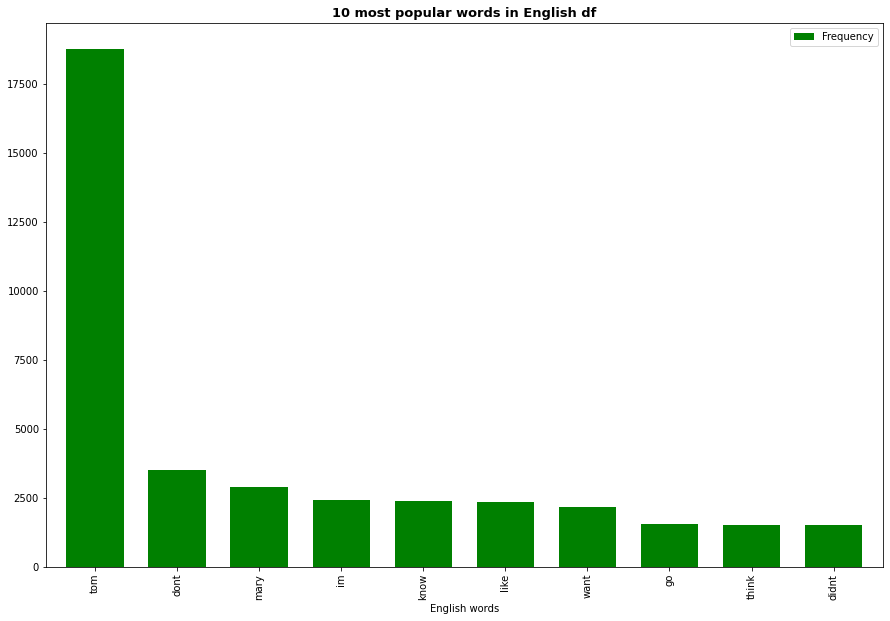

In [40]:
#Plot 10 most popular words in English dataframe after cleaning
number_top_words = 10
eng_stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
re_eng_stopwords = r'\b(?:{})\b'.format('|'.join(eng_stopwords))
# replace '|'-->' ' and drop all stopwords
eng_words = (df.English
            .str.lower()
            .replace([r'\|', re_eng_stopwords], [' ', ''], regex=True)
            .str.cat(sep=' ')
            .split()
)
eng_df = pd.DataFrame(Counter(eng_words).most_common(number_top_words), columns=['English words', 'Frequency'])
print(eng_df)
eng_df.set_index('English words').plot(kind='bar', figsize = (15, 10), width = 0.7, color ='green')
plt.title('10 most popular words in English df', fontsize=13, fontweight='bold')
plt.show()

  German words  Frequency
0          tom      18912
1        maria       2435
2         hast       1590
3         weiß       1175
4        warum       1109
5          tun       1078
6        schon        976
7        immer        962
8          gut        951
9        bitte        888


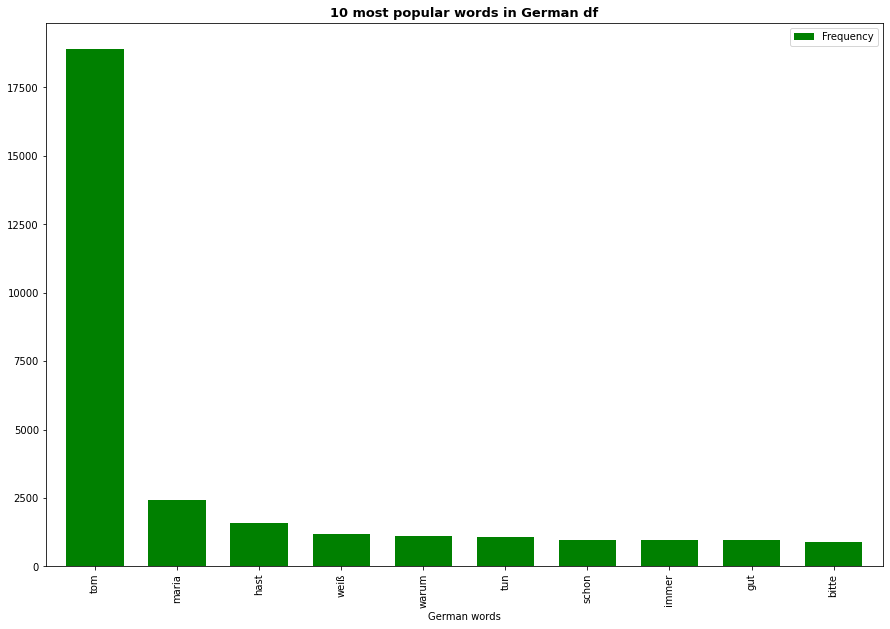

In [41]:
#Plot 10 most popular words in German dataframe after cleaning
number_top_words = 10
de_stopwords = nltk.corpus.stopwords.words('german')
# RegEx for stopwords
re_de_stopwords = r'\b(?:{})\b'.format('|'.join(de_stopwords))
# replace '|'-->' ' and drop all stopwords
de_words = (df.German
            .str.lower()
            .replace([r'\|', re_de_stopwords], [' ', ''], regex=True)
            .str.cat(sep=' ')
            .split()
)
de_df = pd.DataFrame(Counter(de_words).most_common(number_top_words), columns=['German words', 'Frequency'])
print(de_df)
de_df.set_index('German words').plot(kind='bar', figsize = (15, 10), width = 0.7, color ='green')
plt.title('10 most popular words in German df', fontsize=13, fontweight='bold')
plt.show()

In [42]:
clean_df = df.copy()
clean_df

,English,German
0,i have a new book im working on,ich arbeite gerade an einem neuen buch
1,when did you finish the work,wann warst du mit der arbeit fertig
2,i dont want to mess it up,ich will es nicht vermasseln
3,tom bought a camera from mary,tom kaufte maria einen fotoapparat ab
4,what did you think of my house,wir fandet ihr mein haus
...,...,...
72772,i guess tom forgot to tell you,tom hat wohl vergessen es dir zu sagen
72773,i must be leaving now,ich muss jetzt gehen
72774,i did nothing out of the ordinary,ich tat nichts außergewöhnliches
72775,i wish he would write more often,ich wünschte er würde öfter schreiben


In [43]:
#We need to add 'start' and 'end' to German sentences. The tags will help the model to know when to start the translation and when to end the translation
clean_df.German = clean_df.German.apply(lambda i: 'START ' + i + ' END')
clean_df

,English,German
0,i have a new book im working on,START ich arbeite gerade an einem neuen buch END
1,when did you finish the work,START wann warst du mit der arbeit fertig END
2,i dont want to mess it up,START ich will es nicht vermasseln END
3,tom bought a camera from mary,START tom kaufte maria einen fotoapparat ab END
4,what did you think of my house,START wir fandet ihr mein haus END
...,...,...
72772,i guess tom forgot to tell you,START tom hat wohl vergessen es dir zu sagen END
72773,i must be leaving now,START ich muss jetzt gehen END
72774,i did nothing out of the ordinary,START ich tat nichts außergewöhnliches END
72775,i wish he would write more often,START ich wünschte er würde öfter schreiben END


In [44]:
#Check max length of sentence after cleaning
eng_length = []
de_length = []
for i in clean_df.English:
    eng_length.append(len(i.split(' ')))
eng_max_length = max(eng_length)
for i in clean_df.German:
    de_length.append(len(i.split(' ')))
de_max_length = max(de_length)
print("Maximum length of English sentence:", eng_max_length)
print("Maximum length of German sentence:", de_max_length)



Maximum length of English sentence: 44
Maximum length of German sentence: 46


# Model

In [57]:
#Before split our data,we need to shuffle the dataset. It will help to avoid any element of bias/patterns in the split datasets before training our model.
from sklearn.utils import shuffle
shuffled_df = shuffle(clean_df)
shuffled_df

,English,German
26346,i dont have any cash on me right now,START ich habe gerade kein bargeld dabei END
63600,i cant continue to ignore the problem,START ich kann das problem nicht länger ignori...
46651,when he reached the station the train had alre...,START als er am bahnhof ankam war der zug bere...
39665,they loved tom,START sie liebten tom END
58760,i dont like the name tom,START ich mag den namen tom nicht END
...,...,...
21738,i have no home,START ich habe kein haus END
71752,he went out to eat,START er ist weggegangen um zu essen END
56005,this smells bad but it tastes good,START das hier riecht schlimm schmeckt aber gu...
49986,when do we want it,START wann brauchen wir es END


In [58]:
input_text = shuffled_df['English']
target_text = shuffled_df['German']

In [59]:
#Assign target
X= input_text
y = target_text

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #random_state=42

In [61]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (50943,) (50943,)
Test (21834,) (21834,)


In [62]:
X_train[0], y_train[0]

('i have a new book im working on',
 'START ich arbeite gerade an einem neuen buch END')

In [63]:
def max_length(data):
  max_len = max([len(i.split(' ')) for i in data])
  return max_len

In [64]:
#Training data
max_length_english = max_length(X_train)
max_length_german = max_length(y_train)
max_length_english, max_length_german

(44, 46)

In [65]:
#Test data
max_length_english_test = max_length(X_test)
max_length_german_test = max_length(y_test)
max_length_english_test, max_length_german_test

(31, 34)

In [66]:
#Tokenization and padding
#https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/
#We need to convert string input to a numerical list using tokenization. We can turn each character into a number or each word into a number. These are called character and word ids, respectively. Character ids are used for character level models that generate text predictions for each character. A word level model uses word ids that generate text predictions for each word.
#Also, we need to use padding because when batching the sequence of word ids together, each sequence needs to be the same length. Since sentences are dynamic in length, we can add padding to the end of the sequences to make them the same length.

#English
english_tokenizer = Tokenizer()
english_tokenizer.fit_on_texts(X_train)
eng_word_to_index = english_tokenizer.word_index #word to index. Word to index allow to create a dictionary which has all the unique words(terms) as keys with a corresponding unique ID as values
eng_index_to_word = english_tokenizer.index_word #index to word. Index to word is the reverse of word to index. It has the unique IDs as keys and their corresponding words(terms) as values
vocab_size_input = len(eng_word_to_index) + 1

X_train = english_tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_length_english, padding='post')
X_test = english_tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = max_length_english, padding='post')

#German
german_tokenizer = Tokenizer()
german_tokenizer.fit_on_texts(y_train)
de_word_to_index = german_tokenizer.word_index #word to index. 
de_index_to_word = german_tokenizer.index_word #index to word. 
vocab_size_target = len(de_word_to_index) + 1

y_train = german_tokenizer.texts_to_sequences(y_train)
y_train = pad_sequences(y_train, maxlen=max_length_german, padding='post')
y_test = german_tokenizer.texts_to_sequences(y_test)
y_test = pad_sequences(y_test, maxlen = max_length_german, padding='post')

vocab_size_input, vocab_size_target

(9654, 17436)

In [67]:
X_train[0], y_train[0]

(array([  98,  864,    6,  303, 1117,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       dtype=int32),
 array([   1,    3,   41,   18, 1043, 1332, 8634,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0], dtype=int32))

In [68]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (50943, 44) (50943, 46)
Test (21834, 44) (21834, 46)


In [69]:
#Set parameters for model
#train_samples = len(X_train)
#val_samples = len(X_test)
#batch_size = 64
#epochs = 50
latent_dim =500

In [70]:
#Encoder
#The encoder creates a matrix representation of the sentence. The encoder will encode the input sentences. We pass the imput through the input layer. The first hidden layer will be the embeddinglayer. An embedding is a vector representation of the word that is close to similar words in n-dimensional space, where the n represents th size of the embedding vectors.
#We will pass three parameers to embedding: the size of the vocabulary, the dimension of the dense, and mask_zero which implies that the input value of zero is a special padding value that should be masked out
#https://github.com/nageshsinghc4/Neural-machine-translation-NMT/blob/master/neural-machine-translation-attention-mechanism%20(2).ipynb
#https://stackabuse.com/python-for-nlp-neural-machine-translation-with-seq2seq-in-keras/
#https://www.analyticsvidhya.com/blog/2018/03/essentials-of-deep-learning-sequence-to-sequence-modelling-with-attention-part-i/
#https://stackoverflow.com/questions/62357239/add-attention-layer-to-seq2seq-model
#https://www.tensorflow.org/guide/keras/masking_and_padding#masking
from keras.layers import Input, LSTM, Embedding, Dense
encoder_inputs = Input(shape=(max_length_english,)) 
enc_emb = Embedding(vocab_size_input, latent_dim,trainable=True)(encoder_inputs)
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) #state_h is a hidden state, state_c is cell state
#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [71]:
#Attention Layer (Bahdanau Attention) 
#The mechanism will allow the model to focus and place more “Attention” on the relevant parts of the input sequence as needed. The Attention Mechanism directly addresses this issue as it retains and utilises all the hidden states of the input sequence during the decoding process.It creates a unique mapping between each time step of the decoder output to all the encoder hidden states.
#https://machinelearningmastery.com/attention-long-short-term-memory-recurrent-neural-networks/
#https://blog.floydhub.com/attention-mechanism/
#https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/
#https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/
#https://medium.com/analytics-vidhya/neural-machine-translation-using-bahdanau-attention-mechanism-d496c9be30c3
#https://www.tensorflow.org/tutorials/text/nmt_with_attention
#https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/

import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [72]:
#Decoder
#The decoder takes the matrix (which the encoder creates) as input and predicts the translation as output. We create an input layer for the decoder inputs. Embedding will be the first hidden layer. The LSTM layer will return output sequeces as well as the internal states. The internal states will be used only during the inference phase and will not be used during the training phase.LSTM in the decoder takes input from the embedding layer and the encoder states. We will aplly different activation functions to the Dense layer to see which one will better generate the decoder output.
#https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
#https://www.analyticsvidhya.com/blog/2018/03/essentials-of-deep-learning-sequence-to-sequence-modelling-with-attention-part-i/
from keras.layers import TimeDistributed
from keras.layers import Concatenate
decoder_inputs = Input(shape=(None,)) #decoder_token))
dec_emb_layer = Embedding(vocab_size_target, latent_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences = True, return_state = True)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])
#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])
# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
#Dense Layer
decoder_dense = TimeDistributed(Dense(vocab_size_target, activation = 'softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)


In [73]:
#Define the model
#The model will take encoder and decoder inputs top output decoder output
from keras.models import Model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [74]:
#Compile the model
#The RMSprop optimizer is similar to the gradient descent algorithm with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. Therefore, we can increase our learning rate and our algorithm could take larger steps in the horizontal direction converging faster. 
from keras.optimizers import SGD, Adam, Adagrad, Adadelta, RMSprop
optimizer = 'rmsprop' #SGD(lr=0.1)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 44)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 44, 500)      4827000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 44, 500), (N 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

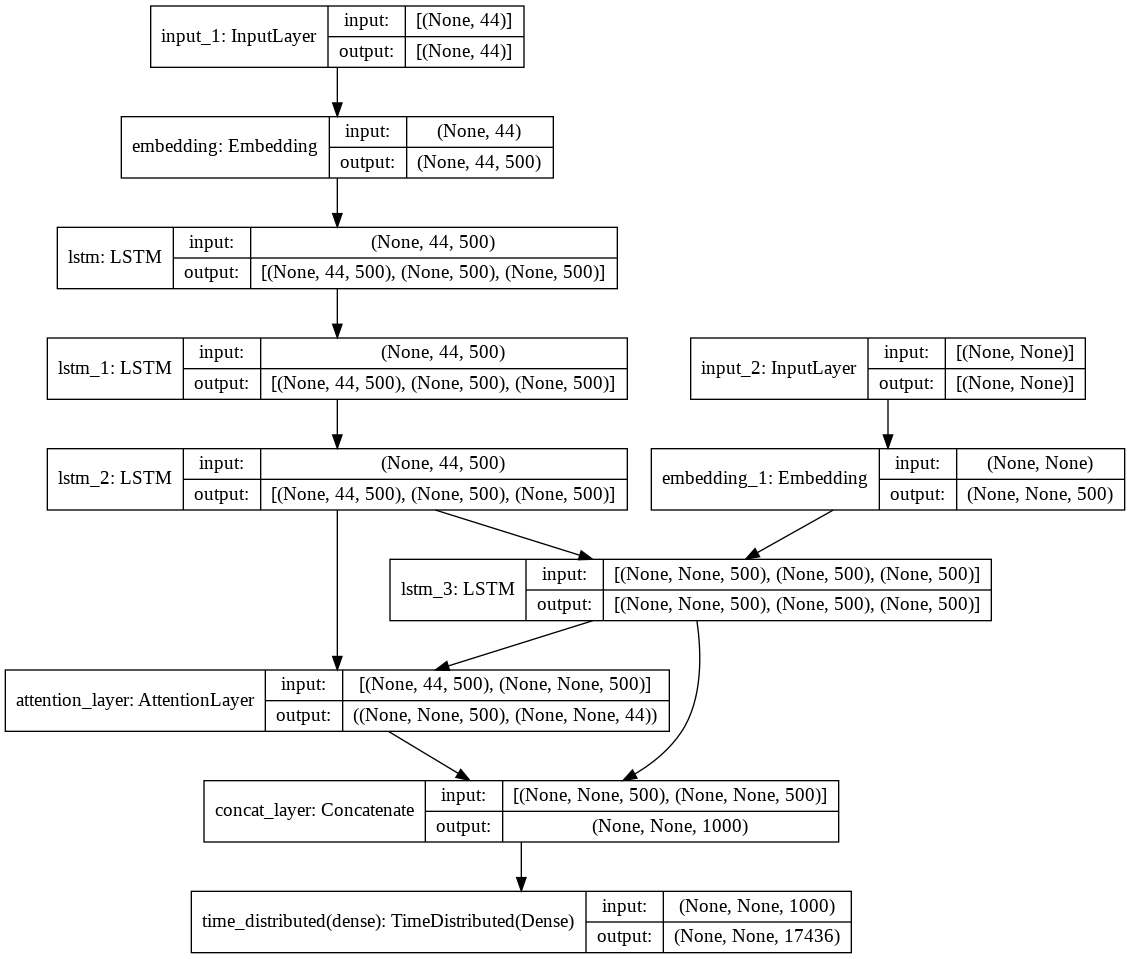

In [75]:
#Plot the model
#https://machinelearningmastery.com/define-encoder-decoder-sequence-sequence-model-neural-machine-translation-keras/
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_eng_de.png', show_shapes=True)

In [76]:
#Set parameters for model
#https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/
#When training a large network, there will be a point during training when the model will stop generalizing and start learning the statistical noise in the training dataset. Too little training will mean that the model will underfit the train and the test sets. Too much training will mean that the model will overfit the training dataset and have poor performance on the test set. To solve this problem we will use EarlyStopping.  During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped.
from keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size = 256
epochs = 50
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [77]:
#https://machinelearningmastery.com/teacher-forcing-for-recurrent-neural-networks/#:~:text=Teacher%20forcing%20works%20by%20using,output%20generated%20by%20the%20network.
history = model.fit([X_train, y_train[:,:-1]], y_train.reshape(y_train.shape[0], y_train.shape[1],1)[:,1:], 
                    epochs=epochs, 
                    callbacks=[es],
                    batch_size=batch_size,
                    validation_data = ([X_test, y_test[:,:-1]], y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:]))

Epoch 1/50
199/199 [==============================] - 278s 1s/step - loss: 1.5685 - accuracy: 0.8292 - val_loss: 0.7870 - val_accuracy: 0.8813
Epoch 2/50
199/199 [==============================] - 241s 1s/step - loss: 0.7839 - accuracy: 0.8810 - val_loss: 0.6629 - val_accuracy: 0.8937
Epoch 3/50
199/199 [==============================] - 237s 1s/step - loss: 0.6525 - accuracy: 0.8947 - val_loss: 0.5831 - val_accuracy: 0.9036
Epoch 4/50
199/199 [==============================] - 237s 1s/step - loss: 0.5639 - accuracy: 0.9051 - val_loss: 0.5289 - val_accuracy: 0.9109
Epoch 5/50
199/199 [==============================] - 240s 1s/step - loss: 0.4913 - accuracy: 0.9142 - val_loss: 0.4969 - val_accuracy: 0.9144
Epoch 6/50
199/199 [==============================] - 237s 1s/step - loss: 0.4346 - accuracy: 0.9216 - val_loss: 0.4645 - val_accuracy: 0.9200
Epoch 7/50
199/199 [==============================] - 235s 1s/step - loss: 0.3847 - accuracy: 0.9289 - val_loss: 0.4462 - val_accuracy: 0.9226

In [78]:
print(history.history.keys())  

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


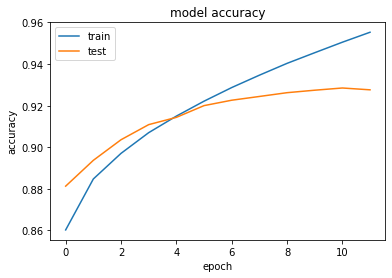

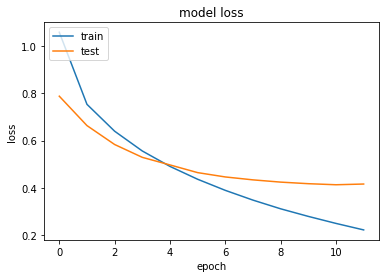

In [79]:
# summarize history for accuracy
plt.figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [80]:
model.save_weights('seq2seq_eng-de_50epochs.h5')


In [81]:
test_loss, test_acc = model.evaluate([X_test, y_test[:,:-1]], y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:] , verbose=1)

683/683 [==============================] - 45s 66ms/step - loss: 0.4163 - accuracy: 0.9276


# Inference (sampling)

In [92]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.load_weights('seq2seq_eng-de_50epochs.h5')

In [93]:
#https://nextjournal.com/gkoehler/machine-translation-seq2seq-cpu#data-preparation
#We need to encode the input sequence to get context vectors
latent_dim=500
#Load encoder inputs
encoder_inputs = model.input[0]
#Load encoder outputs
encoder_outputs, state_h, state_c = model.layers[6].output
#Encoder model
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])
print(encoder_inputs.shape)

(None, 44)


In [94]:
#Decoder setup
#https://keras.io/examples/nlp/lstm_seq2seq/
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(44,latent_dim))
#Embeddings of the decoder sequence
decoder_inputs = model.layers[3].output
dec_emb_layer = model.layers[5]
dec_emb2= dec_emb_layer(decoder_inputs)
# Set the initial states to the states from the previous time step (we need it to predict the next word in the sequence)
decoder_lstm = model.layers[7]
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
#Attention inference
attn_layer = model.layers[8]
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])

concate = model.layers[9]
decoder_inf_concat = concate([decoder_outputs2, attn_out_inf])
# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_dense = model.layers[10]
decoder_outputs2 = decoder_dense(decoder_inf_concat)

#Decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c], 
    [decoder_outputs2] + [state_h2, state_c2])    
print(decoder_inputs.shape)                                      

(None, None)


In [95]:
#https://keras.io/examples/nlp/lstm_seq2seq/
#Function to perfrom the process of decoding a given input sequence
def decode_sequence(input_seq):
  #encode the input as state vectors
  e_out, e_h, e_c = encoder_model.predict(input_seq)
  #generate empty target sequence of length 1 with only the start word
  target_seq = np.zeros((1, 1))
  target_seq[0, 0] = de_word_to_index['start']
  #output loop for a batch of sequences
  stop_condition = False
  decoded_sentence = ''
  while not stop_condition:
    output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
    #sample a token, add the corresponding word to the decoded sequence
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    if sampled_token_index == 0:
      break
    else:
      sampled_token = de_index_to_word[sampled_token_index]
      if(sampled_token!='end'):
        decoded_sentence += ' '+sampled_token
      #exit condition: either hitting max length or find stop word
      if (sampled_token == 'end' or 
        len(decoded_sentence.split()) >= (44-1)):
        stop_condition = True
    #update the target sequence of length 1
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = sampled_token_index
    #update states
    e_h, e_c = h, c
  return decoded_sentence

In [96]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=de_word_to_index['start']) and i!=de_word_to_index['end']):
        newString=newString+de_index_to_word[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+eng_index_to_word[i]+' '
    return newString

In [97]:
#Predictions
for i in range(10):
  
  print("Input English sentence:",seq2text(X_test[i]))
  print("Actual German sentence:",seq2summary(y_test[i]))
  print("Predicted German transaltion:",decode_sequence(X_test[i].reshape(1,44)))
  print("\n")

Input English sentence: tom sounded upset 
Actual German sentence: tom hat aufgebracht 
Predicted German transaltion:  tom fühlte sich selbst die schuld


Input English sentence: wheres the rest of your family 
Actual German sentence: wo ist der rest ihrer familie 
Predicted German transaltion:  wo ist die ihre familie


Input English sentence: i usually eat alone 
Actual German sentence: ich esse normalerweise allein 
Predicted German transaltion:  ich esse normalerweise im leben


Input English sentence: the bride was wearing a white wedding dress 
Actual German sentence: die braut trug ein weißes 
Predicted German transaltion:  die temperatur wurde in einer einem jahr trug die universität trug


Input English sentence: the police cant question tom until his lawyer gets here 
Actual German sentence: die polizei kann tom erst ins verhör nehmen wenn sein rechtsanwalt hier ist 
Predicted German transaltion:  die polizei hat tom einen fehler von seiner schule sehen sehen


Input English 

In [98]:
# BLEU Score
#'Measures how many words overlap in a given translation when compared to a reference translation, giving higher scores to sequential words.' (recall)
#https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
#https://machinelearningmastery.com/calculate-bleu-score-for-text-python/
from nltk.translate.bleu_score import sentence_bleu
for i in range(10):
  reference = seq2summary(y_test[i])
  candidate = decode_sequence(X_test[i].reshape(1,44))
score = sentence_bleu(reference, candidate)
print(score)

0.7559289460184544


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().



In [99]:
#Cumulative N-Gram Scores
#Cumulative scores refer to the calculation of individual n-gram scores at all orders from 1 to n and weighting them by calculating the weighted geometric mean.
print('Cumulative 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
print('Cumulative 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
print('Cumulative 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0)))
print('Cumulative 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25)))

Cumulative 1-gram: 0.326531
Cumulative 2-gram: 0.571429
Cumulative 3-gram: 0.691186
Cumulative 4-gram: 0.755929


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning:


Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().



Resources
https://dashayushman.github.io/tutorials/2017/08/19/neural-language-model.html
https://ruder.io/word-embeddings-1/
https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/
https://machinelearningmastery.com/how-to-develop-a-word-level-neural-language-model-in-keras/
https://towardsdatascience.com/neural-machine-translation-with-python-c2f0a34f7dd
https://github.com/nageshsinghc4/Neural-machine-translation-NMT/blob/master/neural-machine-translation-attention-mechanism%20(2).ipynb
https://www.geeksforgeeks.org/activation-functions-neural-networks/
https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
https://www.analyticsvidhya.com/blog/2018/03/essentials-of-deep-learning-sequence-to-sequence-modelling-with-attention-part-i/
https://towardsdatascience.com/a-look-at-gradient-descent-and-rmsprop-optimizers-f77d483ef08b
https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
https://machinelearningmastery.com/5-step-life-cycle-long-short-term-memory-models-keras/
https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/
https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/
https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
https://stackoverflow.com/questions/62357239/add-attention-layer-to-seq2seq-model
https://keras.io/examples/nlp/lstm_seq2seq/
https://www.tensorflow.org/guide/keras/masking_and_padding#masking
https://nextjournal.com/gkoehler/machine-translation-seq2seq-cpu
https://nextjournal.com/gkoehler/machine-translation-seq2seq-cpu#data-preparation
https://www.analyticsvidhya.com/blog/2019/07/how-get-started-nlp-6-unique-ways-perform-tokenization/
https://machinelearningmastery.com/teacher-forcing-for-recurrent-neural-networks/#:~:text=Teacher%20forcing%20works%20by%20using,output%20generated%20by%20the%20network.
https://machinelearningmastery.com/attention-long-short-term-memory-recurrent-neural-networks/
https://blog.floydhub.com/attention-mechanism/
https://www.analyticsvidhya.com/blog/2019/11/comprehensive-guide-attention-mechanism-deep-learning/
https://medium.com/analytics-vidhya/neural-machine-translation-using-bahdanau-attention-mechanism-d496c9be30c3
https://www.tensorflow.org/tutorials/text/nmt_with_attention
https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/
https://github.com/LaurentVeyssier/Machine
-translation-English-French-with-Deep-neural-Network/blob/main/machine_translation.ipynb
https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/

